In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df=pd.read_csv('kc_housingdata.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df_num=df[['price','bedrooms','bathrooms','sqft_living']]

In [7]:
def scale(x):
    return (x-np.mean(x))/np.std(x)


In [8]:
df_scaled=df_num.apply(scale)

In [9]:
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [10]:
import sklearn.preprocessing as pre

In [11]:
df_scaled=pre.scale(df_num)

In [12]:
df_scaled

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732]])

In [13]:
from sklearn.cluster import KMeans as km

In [14]:
mod=km(n_clusters=3,init='k-means++')

In [15]:
mod=mod.fit(df_scaled)

In [16]:
mod.labels_

array([1, 2, 1, ..., 1, 2, 1])

In [17]:
mod.cluster_centers_

array([[ 1.94021339,  1.08643761,  1.55899777,  1.95423096],
       [-0.46359928, -0.72099678, -0.85859773, -0.7878014 ],
       [-0.02557355,  0.36583833,  0.37994919,  0.23859945]])

In [18]:
pred=mod.predict(df_scaled)

In [19]:
pred

array([1, 2, 1, ..., 1, 2, 1], dtype=int32)

## Elbow Method
Here, you draw a curve between WSS (within sum of squares) and the number of clusters. It is called elbow method because the curve looks like a human arm and the elbow point gives us the optimum number of clusters. As you can see that after the elbow point, there is a very slow change in the value of WSS, so you should take the elbow point value as the final number of clusters.

In [20]:
from scipy.spatial.distance import cdist

## WSS
*The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.

*The WSS score is the sum of these Squared Errors for all the points.

*Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

In [21]:
wss=[]
for k in range(1,20):
    mod=km(n_clusters=k,init='k-means++')
    mod.fit(df_scaled)
    wss.append(sum(np.min(cdist(df_scaled,mod.cluster_centers_,metric='euclidean'),axis=1))/df_scaled.shape[0])


In [22]:
import matplotlib.pyplot as plt
k=range(1,20)

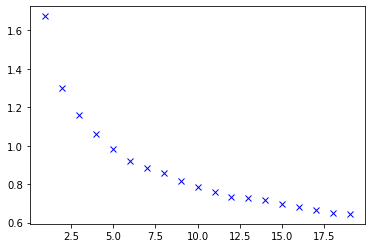

In [23]:
plt.plot(k,wss,'bx')

In [26]:
labels=km(n_clusters=3,random_state=200).fit(df_scaled).labels_
labels

array([1, 2, 1, ..., 1, 2, 1])

In [29]:
import sklearn.metrics as metrics

In [33]:
metrics.silhouette_score(df_scaled,labels,sample_size=1000,random_state=200)

0.3247952971305967

In [36]:
for i in range(7,16):
    labels=km(n_clusters=8,random_state=200).fit(df_scaled).labels_
    print(i-6,':',metrics.silhouette_score(df_scaled,labels,sample_size=1000,random_state=200))

1 : 0.2903953376334379
2 : 0.2903953376334379
3 : 0.2903953376334379
4 : 0.2903953376334379
5 : 0.2903953376334379
6 : 0.2903953376334379
7 : 0.2903953376334379
8 : 0.2903953376334379
9 : 0.2903953376334379


## Let's Cluster Images

In [60]:
import cv2
import os
import numpy as np
# Directory where images are stored for clustering
os.chdir(r'C:\Users\shubham jain\AI 7\ML\Clustering Algo\Images')

In [64]:
def get_img(path): 
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(90,135),cv2.INTER_LINEAR)
    i=img[:100,:]
    return i


In [65]:
labels=[]
images=[]
for i in(['1','2','3','4']):
    for p in enumerate(os.listdir(os.getcwd()+'\\'+i)):
        images.append(get_img(os.getcwd()+'\\'+i+'\\'+p[1]))
        labels.append(i)

In [66]:
x=np.array(images)
x.shape

(380, 100, 90)

In [67]:
import matplotlib.pyplot as plt

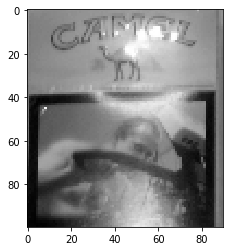

In [71]:
plt.imshow(x[240,:],cmap='gray')

In [74]:
pixels=x.flatten().reshape(380,9000)
pixels.shape

(380, 9000)

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scale=MinMaxScaler()

In [78]:
y=scale.fit_transform(pixels)
y

array([[0.        , 0.01904762, 0.0913242 , ..., 0.03791469, 0.27896996,
        0.50434783],
       [0.7047619 , 0.71428571, 0.66210046, ..., 0.16113744, 0.29613734,
        0.69130435],
       [0.75238095, 0.75238095, 0.7716895 , ..., 0.28436019, 0.26609442,
        0.5       ],
       ...,
       [0.74285714, 0.76666667, 0.7716895 , ..., 0.8056872 , 0.73390558,
        0.75652174],
       [0.78571429, 0.79047619, 0.73972603, ..., 0.82464455, 0.75965665,
        0.77391304],
       [0.78571429, 0.7952381 , 0.81278539, ..., 0.7535545 , 0.75965665,
        0.7826087 ]])

In [79]:
km=km(n_clusters=4,random_state=200,n_init=10)
np.random.seed(100)
km.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=200, tol=0.0001, verbose=0)

In [80]:
km.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [82]:
img_cluster=pd.DataFrame({'cluster':km.labels_,'id':range(380)})
img_cluster.head()

,cluster,id
0,3,0
1,3,1
2,3,2
3,3,3
4,3,4


In [88]:
clus_1=img_cluster[img_cluster.cluster==0]
clus_1.head()

,cluster,id
105,0,105
106,0,106
108,0,108
109,0,109
110,0,110


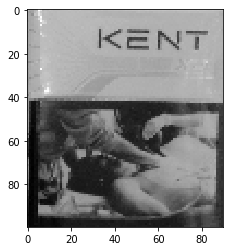

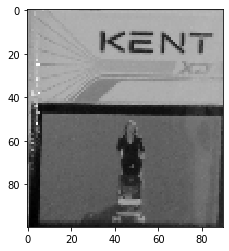

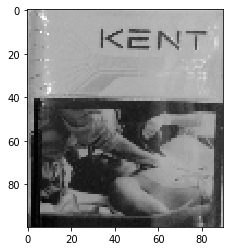

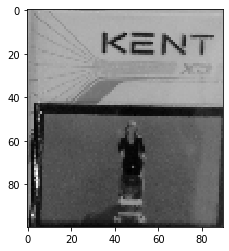

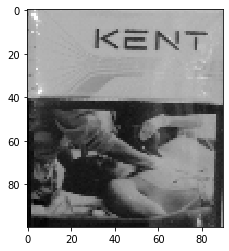

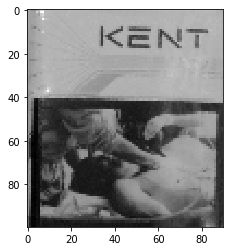

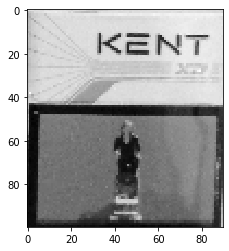

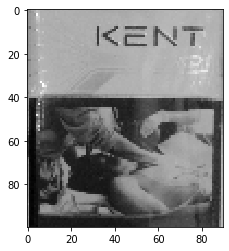

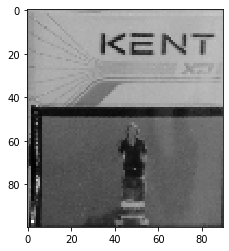

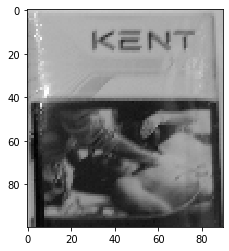

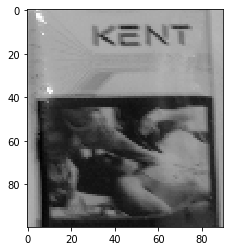

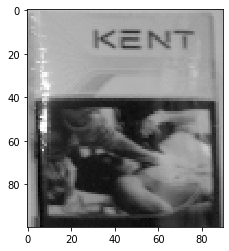

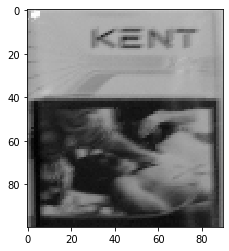

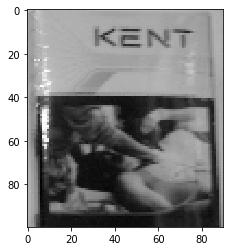

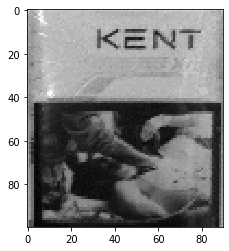

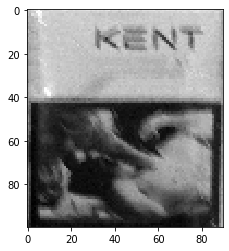

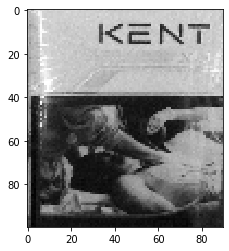

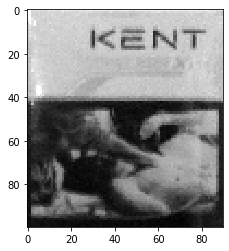

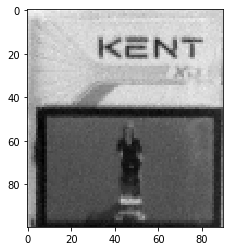

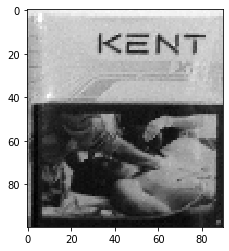

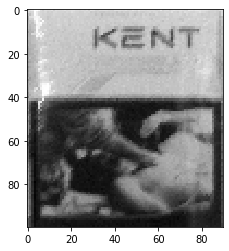

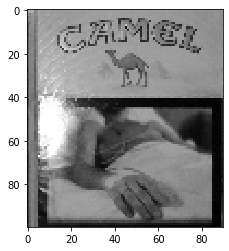

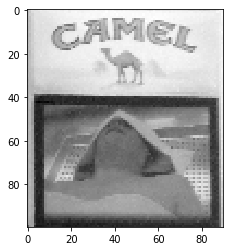

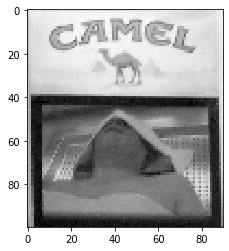

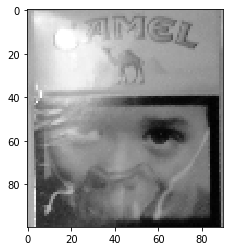

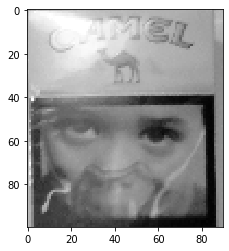

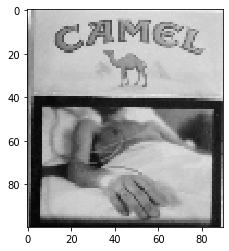

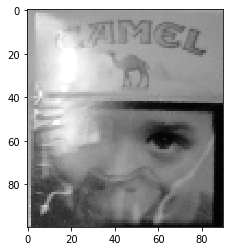

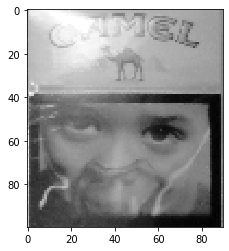

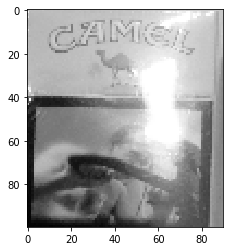

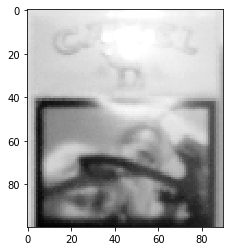

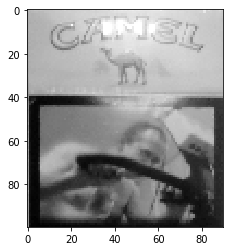

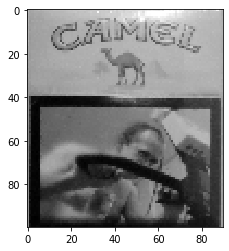

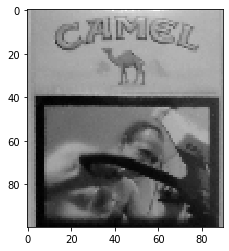

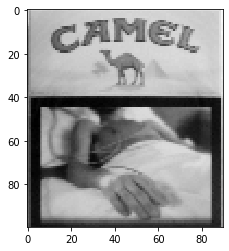

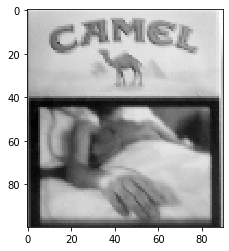

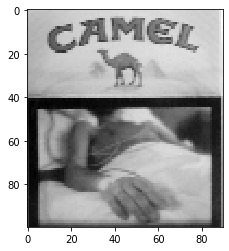

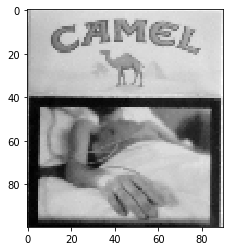

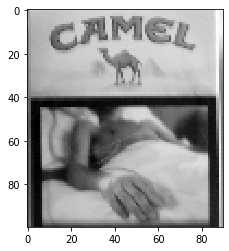

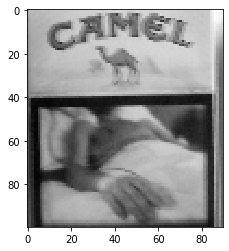

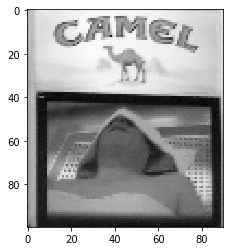

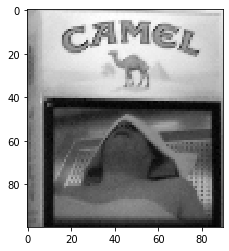

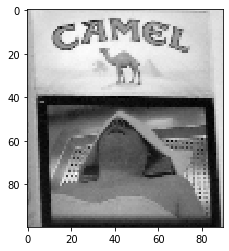

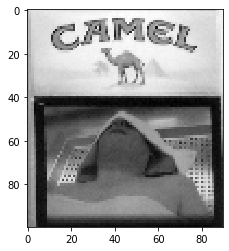

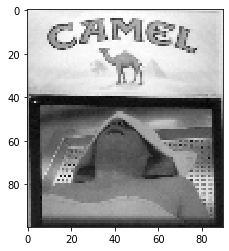

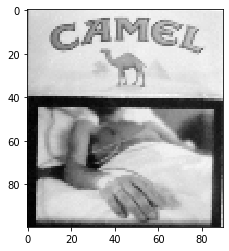

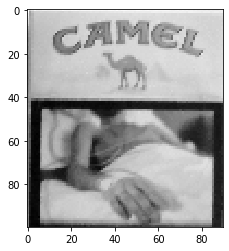

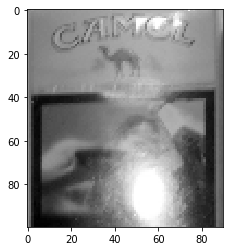

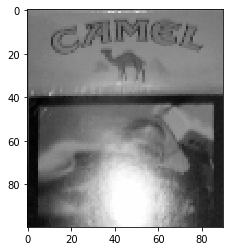

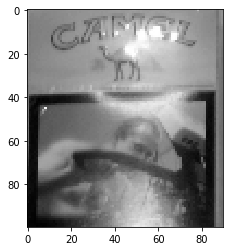

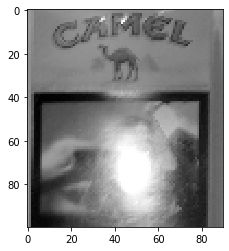

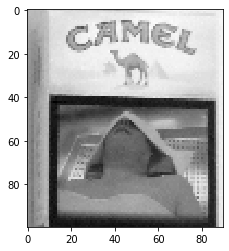

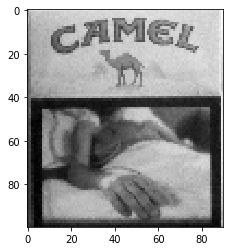

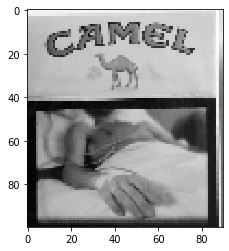

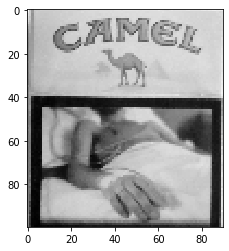

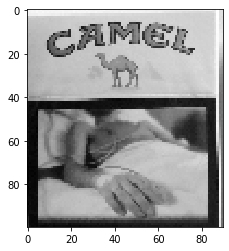

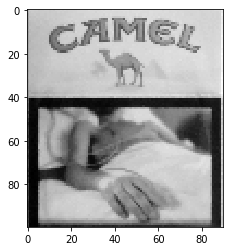

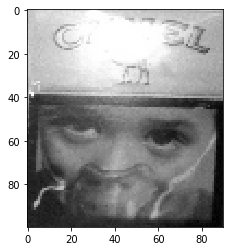

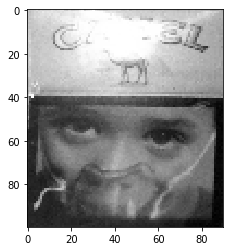

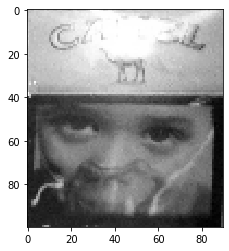

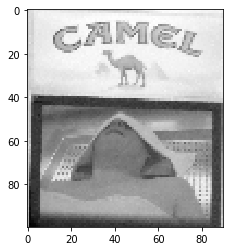

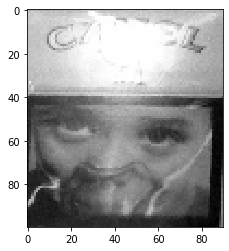

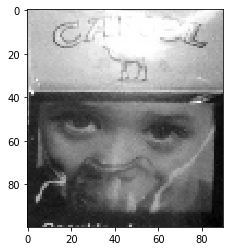

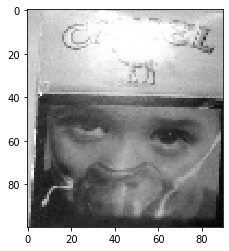

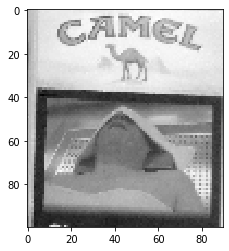

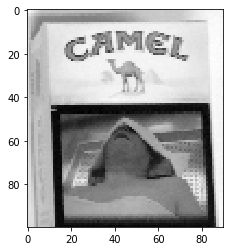

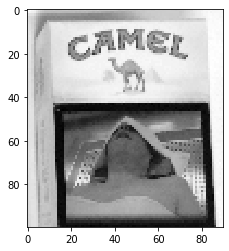

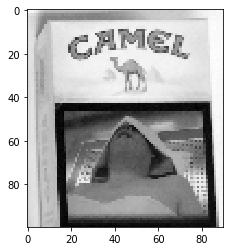

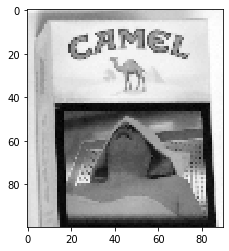

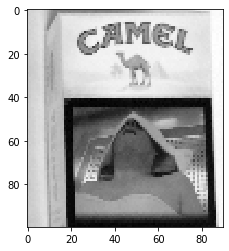

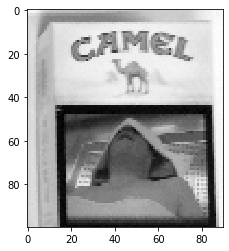

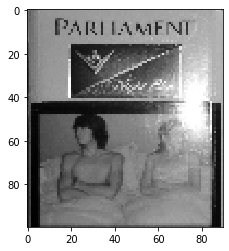

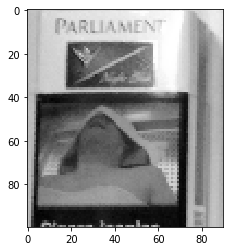

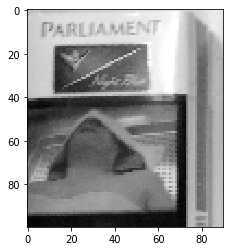

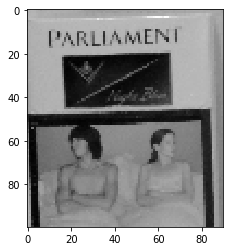

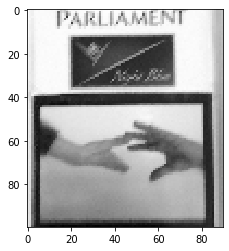

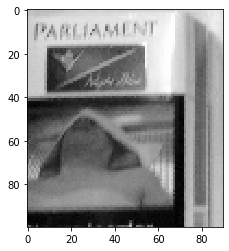

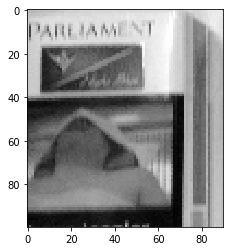

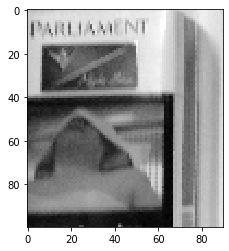

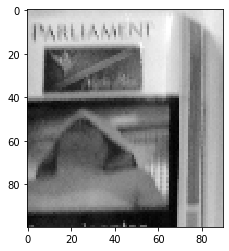

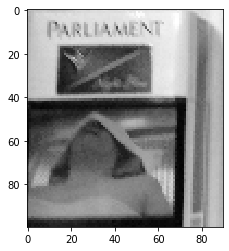

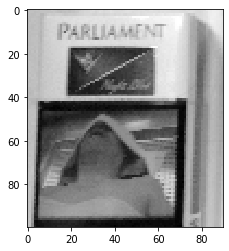

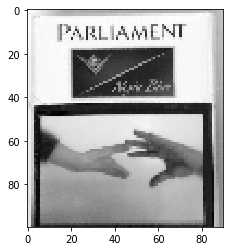

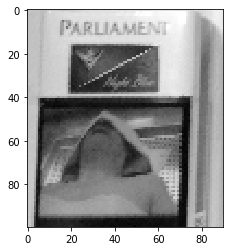

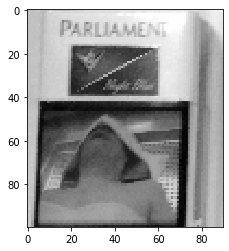

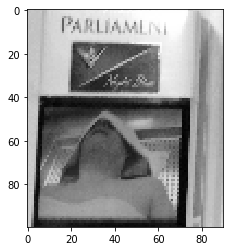

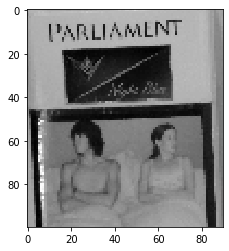

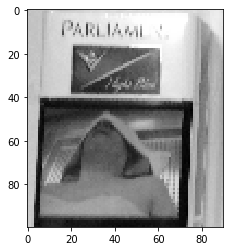

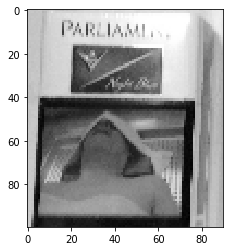

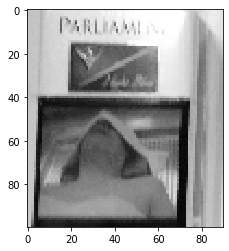

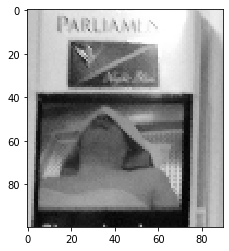

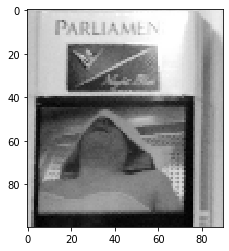

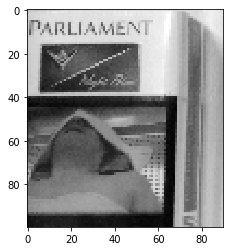

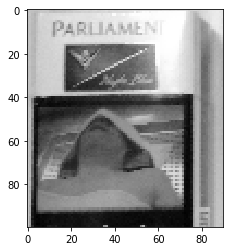

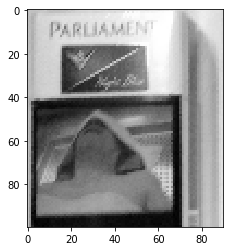

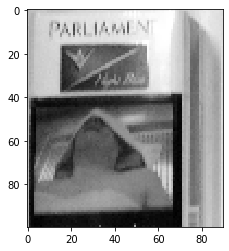

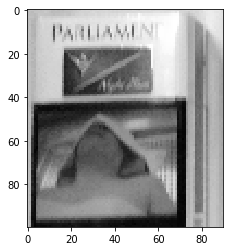

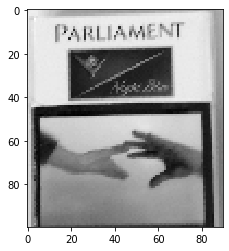

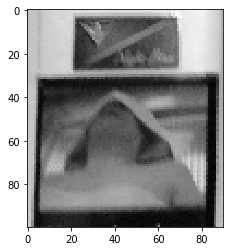

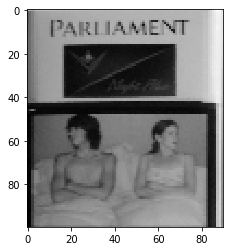

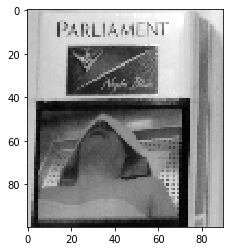

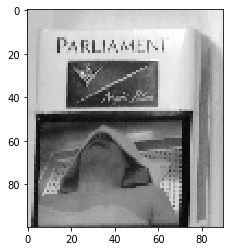

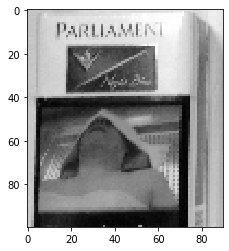

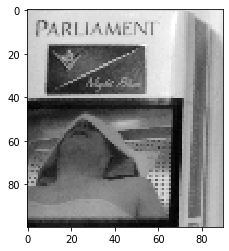

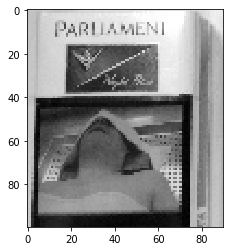

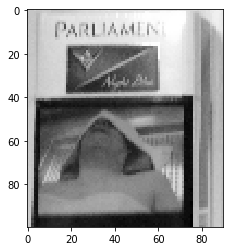

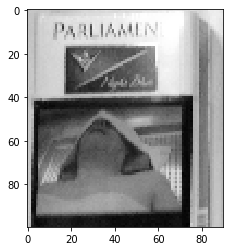

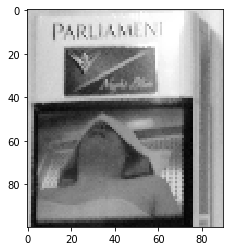

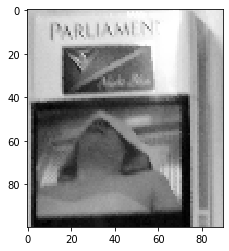

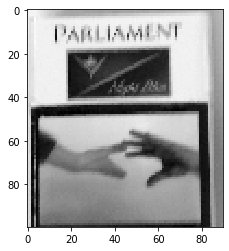

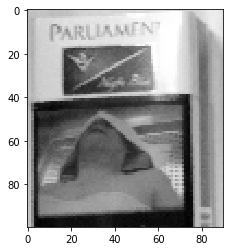

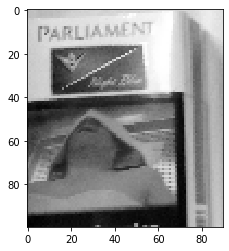

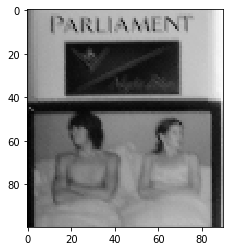

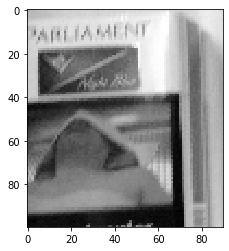

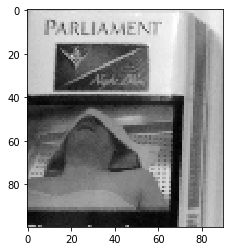

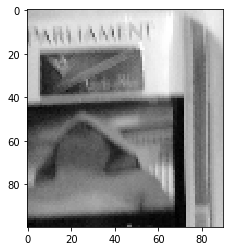

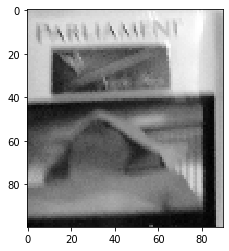

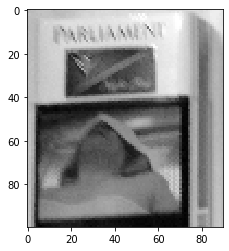

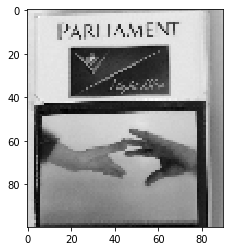

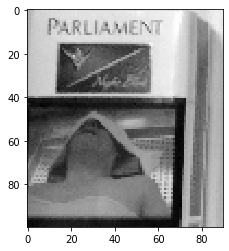

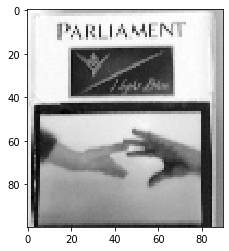

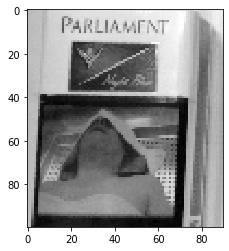

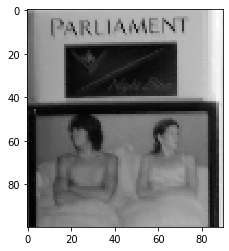

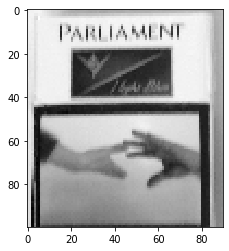

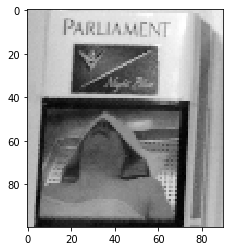

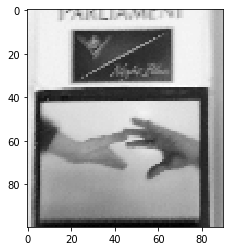

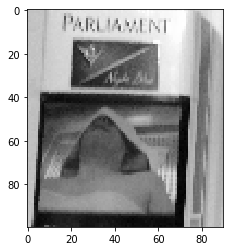

In [91]:
for i in clus_1.id:
    plt.imshow(x[i,:],cmap='gray')
    plt.show()